In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("Crop_recommendation.csv")

# Display first 5 rows
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate input and output
X = data.drop("label", axis=1)
y = data["label"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931818181818182


In [ ]:
!pip install geneticalgorithm

In [ ]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

# Fitness function
def fitness_function(solution):
    selected_features = X.columns[np.array(solution, dtype=bool)]

    if len(selected_features) == 0:
        return 1  # worst case if no features selected

    X_selected = X[selected_features]

    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

    model_fs = RandomForestClassifier()
    model_fs.fit(X_train_fs, y_train_fs)
    y_pred_fs = model_fs.predict(X_test_fs)

    accuracy_fs = accuracy_score(y_test_fs, y_pred_fs)

    return 1 - accuracy_fs  # GA minimizes function

 The best solution found:
 [1. 1. 1. 1. 1. 1. 1.]

 Objective function:
 0.004545454545454519


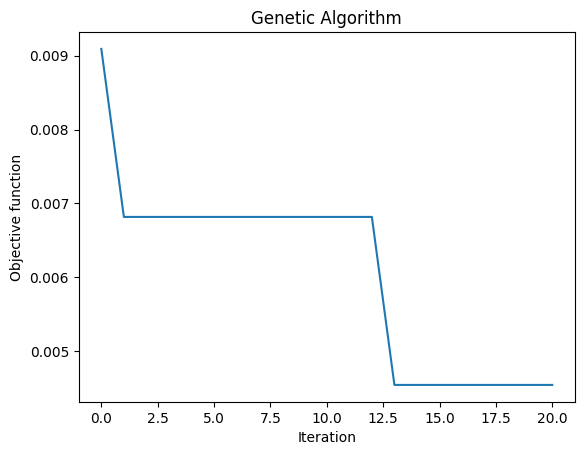

In [ ]:
dimension = X.shape[1]

varbound = np.array([[0,1]] * dimension)

algorithm_param = {
    'max_num_iteration': 20,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type':'uniform',
    'max_iteration_without_improv':None
}

model_ga = ga(function=fitness_function,
              dimension=dimension,
              variable_type='bool',
              variable_boundaries=varbound,
              algorithm_parameters=algorithm_param)

model_ga.run()

In [ ]:
best_solution = model_ga.output_dict['variable']
selected_features = X.columns[np.array(best_solution, dtype=bool)]
print("Selected Features:", selected_features)

Selected Features: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


In [ ]:
# Accuracy using selected features

X_selected = X[selected_features]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

model_fs = RandomForestClassifier()
model_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = model_fs.predict(X_test_fs)

accuracy_fs = accuracy_score(y_test_fs, y_pred_fs)

print("Original Accuracy:", accuracy)
print("GA Selected Features Accuracy:", accuracy_fs)

Original Accuracy: 0.9931818181818182
GA Selected Features Accuracy: 0.9931818181818182


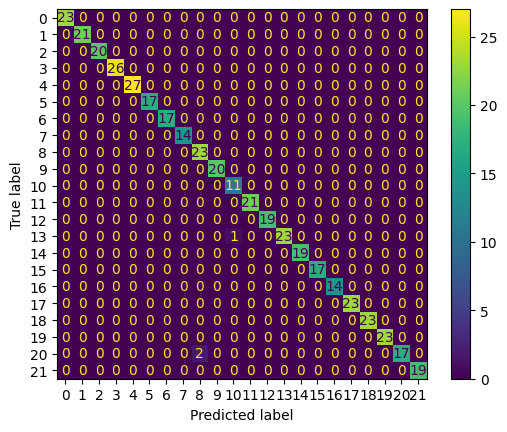

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

       Feature  Importance
6     rainfall    0.230390
4     humidity    0.213905
2            K    0.173318
1            P    0.140993
0            N    0.105444
3  temperature    0.078233
5           ph    0.057716


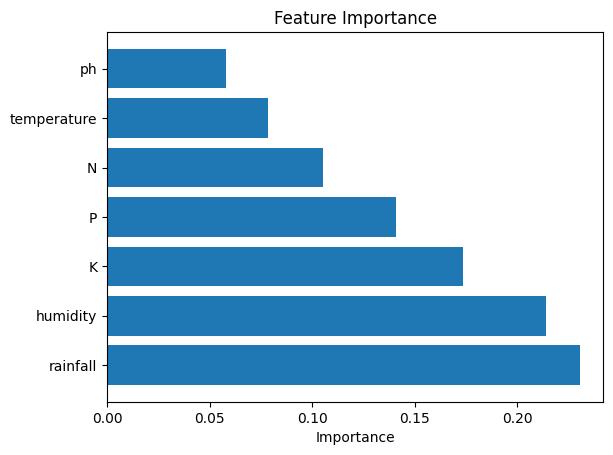

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9931818181818182


In [18]:
#Example
new_data = pd.DataFrame(
    [[70, 50, 40, 18, 60, 6.5, 100]],
    columns=X.columns
)

prediction = model.predict(new_data)
print("Recommended Crop:", prediction[0])

Recommended Crop: maize
